In [ ]:
from cv2.typing import MatLike
from numpy.typing import NDArray

import cv2
import numpy as np
import matplotlib.pyplot as plt

from modules.calibration import draw_keypoints_and_match, drawlines, RANSAC_F_matrix, compute_Essential_matrix
from modules.correspondence import ssd_correspondence
from modules.depth import disparity_to_depth
from modules import draw_show_img_utils as dsiu
from old.rectification import rectification

from gallery.cencus import cencus_correspondence
from datasets.load_dataset import Data

## How to run

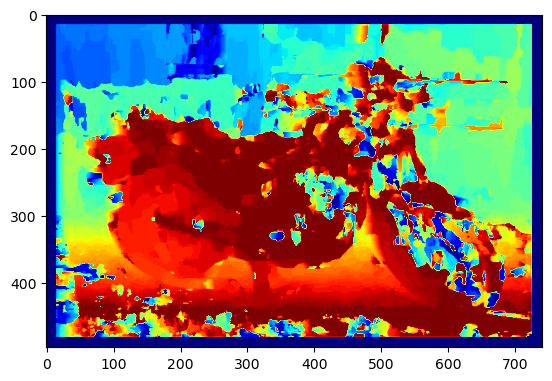

In [ ]:
data = Data(2)

img1 = data.img1
img2 = data.img2

pts1, pts2, matched_img = draw_keypoints_and_match(
    img1, img2)

F_mat = RANSAC_F_matrix(
    pts1, pts2, max_iter=64, max_inliers=64)

E_mat = compute_Essential_matrix(F_mat, data.calib["cam0"], data.calib["cam1"])

# rectified_pts1, rectified_pts2, img1_rectified, img2_rectified = rectification(img1, img2, pts1, pts2, F)
_, disparity_map_scaled = ssd_correspondence(
    img1, img2, 15, x_search_block_size=50) 

img_n = cv2.normalize(src=disparity_map_scaled, dst=None, alpha=0,
                        beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.imshow(img_n, cmap="jet")